In [1]:
from src.l_curve import create_L_curve
import matplotlib.pyplot as plt
import pandas as pd
import os
import firedrake

2024-07-04 22:07:14.067710: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 22:07:14.068229: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 22:07:14.071047: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 22:07:14.102242: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 22:07:14.826718: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
def plot_lcurve(l_curve,loglog=False):
    # Plot
    plt.figure(figsize=(10, 6))

    # Plot scatter points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')

    # Plot line connecting the points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')

    # Annotate points with regularization values
    for i, txt in enumerate(l_curve['reg']):
        plt.annotate(txt, (l_curve['J1'][i], l_curve['J2'][i]))

    plt.xlabel('E')
    plt.ylabel('R')
    plt.title('Log-Log Plot of E vs R with Regularization Constants')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
variable = 'simultaneous'

#### Pine Island L-curve

In [ ]:
l_curve = create_L_curve(None, variable, outline='pine-island', mesh='pig', invert_iter = 300, workers = 2,  lcar=9e3, nosigma_lossfcn = 'regular', drichlet_ids = [2,3,4], regularization_grad_fcn = True, constant_val=0.01)

In [7]:
# Data for the new set
reg_values = [ 0.01, 0.1, 1, 10, 100, 1000, 10000]
J1_values = [ 96345.67622105534, 78489.95021182428, 
             1055.2893058650764, 1027.9826455936166, 1031.6734742146652, 1024.514731240655, 
             1025.1542646808318]
J2_values = [ 4.674823096395248, 6.875311073090092, 
             54.36880487699734, 144.7299580085007, 143.0240864061365, 154.4104059443432, 
             153.6344552930043]

# Create the dataframe
l_curve = pd.DataFrame({
    'reg': reg_values,
    'J1': J1_values,
    'J2': J2_values
})

| reg       | J1             | J2            |
|-----------|----------------|---------------|
| 0.0001    | 151334.775663  | 0.002093      |
| 0.001     | 20770.048587   | 0.015175      |
| 0.01      | 96345.676221   | 4.674823      |
| 0.1       | 78489.950212   | 6.875311      |
| 1         | 1055.289306    | 54.368805     |
| 10        | 1027.982646    | 144.729958    |
| 100       | 1031.673474    | 143.024086    |
| 1000      | 1024.514731    | 154.410406    |
| 10000     | 1025.154265    | 153.634455    |

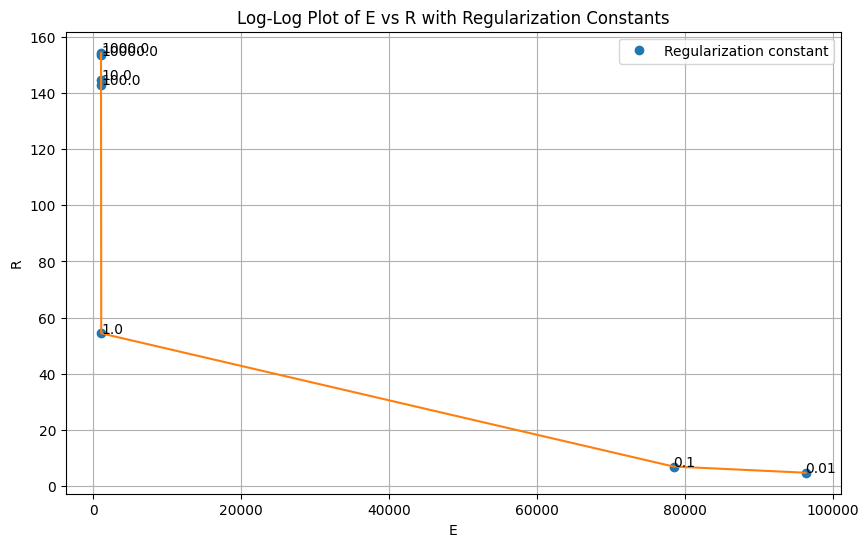

In [8]:
plot_lcurve(l_curve)

Based on these values Regularization Constant of 1.0 can be selected

#### Thwaites L-curve

In [4]:
l_curve = create_L_curve(None, variable, outline='data/geojson/thwaites.geojson', mesh='thwaites', invert_iter = 170, workers = 2,  lcar=9e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [1,2,5,6], regularization_grad_fcn = True, constant_val=0.01)

reg_const:  1

 function started for simultaneous 1
Reading local outline
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing fields
Defining friction law
Setting ramp type to default
Reading velocity from measures database
C0 is constant: 0.01
Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.144299e+08   1.041549e+04                  2.182136e+04   
  1     7.365918e+07   3.607487e+03   2.182136e+04   5.455339e+04   3         2         0         1         3         
  2     1.276159e+07   8.687447e+02   5.455339e+04   1.363835e+05   4         3         0         3         2         
  3     1.276159e+07   8.687447e+02   1.363835e+05   8.523967e+03   5         3         2         3         2         
  4     7.676839e+06   4.417138e+02   8.523967e+03   2.130992e+04   6         4         0         1  

ConvergenceError: ('LinearSolver failed to converge after %d iterations with reason: %s', 0, 'DIVERGED_PCSETUP_FAILED')

In [ ]:
reg_const:  0.01   J:  [568.5430921059252, 0.029821845834902418]
reg_const:  0.1   J:  [200.15193884090579, 0.5584096178962419]
reg_const:  1   J:  [125.05111469154097, 10.077985527278557]
reg_const:  10   J:  [131.02607789480362, 16.01170699159037]

In [5]:
data = {
    'reg': [0.01, 0.1, 1, 10],
    'J1': [568.5430921059252, 200.15193884090579, 125.05111469154097, 131.02607789480362],
    'J2': [0.029821845834902418, 0.5584096178962419, 10.077985527278557, 16.01170699159037]
}

l_curve = pd.DataFrame(data)
l_curve = l_curve.sort_values('reg')
l_curve

l_curve = pd.DataFrame(data)

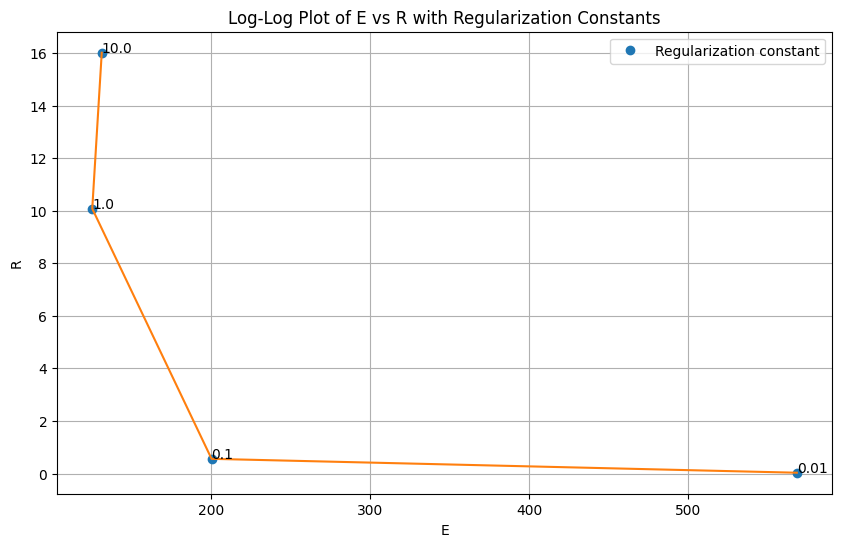

In [8]:
plot_lcurve(l_curve, loglog=False)

#### Dotson L-curve

In [4]:
l_curve = create_L_curve(None, variable, outline='data/geojson/dotson-crosson.geojson', mesh='dotson', invert_iter = 300, workers = 2,  lcar=10e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [1,2,5,6,7,8,9,10,11], regularization_grad_fcn = True, constant_val=0.01)


 function started for simultaneous 10
 function started for simultaneous 100

Reading local outlineReading local outline



Creating meshCreating mesh

Reading mesh
Reading mesh
Reading bedmachine data
Reading bedmachine data
Initializing function spacesInitializing function spaces

Initializing fields
Initializing fields
Defining friction law
Setting ramp type to Defining friction lawdefault

Reading velocity from measures databaseSetting ramp type to 
default
Reading velocity from measures database
C0 is constant: 0.01
Using loss function without sigma
C0 is constant: 0.01
Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.221807e+08   6.295950e+03                  2.043957e+04   

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.221807e+08   6.295950e+03                  2.043957e+04   
  1     4.259700e+07   2.181200e+03   2.043957e+04   5.109893e+0

ConvergenceError: ('LinearSolver failed to converge after %d iterations with reason: %s', 0, 'DIVERGED_PCSETUP_FAILED')

In [6]:
data = {
    'reg': [0.01, 0.1, 1, 100],
    'J1': [1940.0857585219212, 552.5697993920149, 260.4363104810728, 224.77324734206692],
    'J2': [0.08833021365283901, 1.8275757046578123, 45.85306601609634, 323.2068724742969]
}

l_curve = pd.DataFrame(data)
l_curve


,reg,J1,J2
0,0.01,1940.085759,0.088330
1,0.10,552.569799,1.827576
2,1.00,260.436310,45.853066
3,100.00,224.773247,323.206872


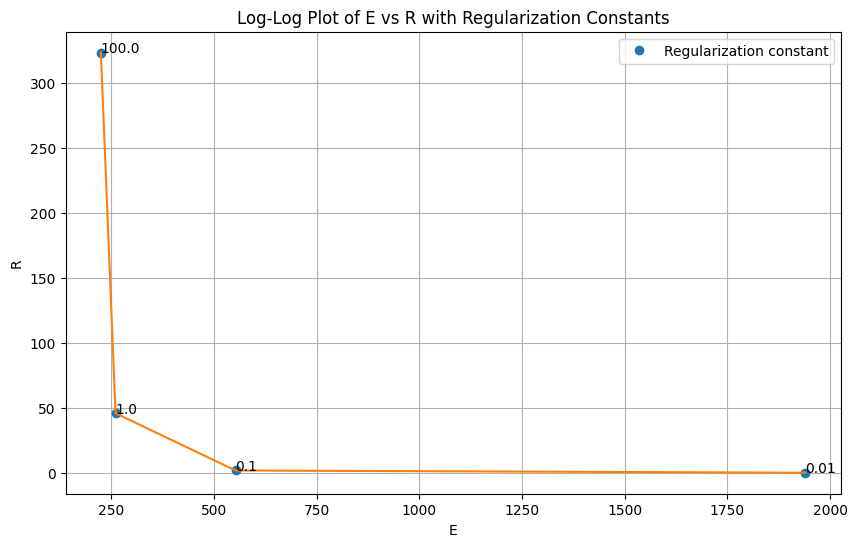

In [7]:
plot_lcurve(l_curve, loglog=False)